In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [32]:
csv_file_path = "/content/heart_disease_uci.csv"
df = pd.read_csv(csv_file_path)

In [33]:
df.drop(columns=['id'], inplace=True, errors='ignore')

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.dropna(inplace=True)

df['target'] = (df['num'] > 0).astype(int)

In [34]:
X = df[['cp', 'oldpeak']].values
y = df['target'].values

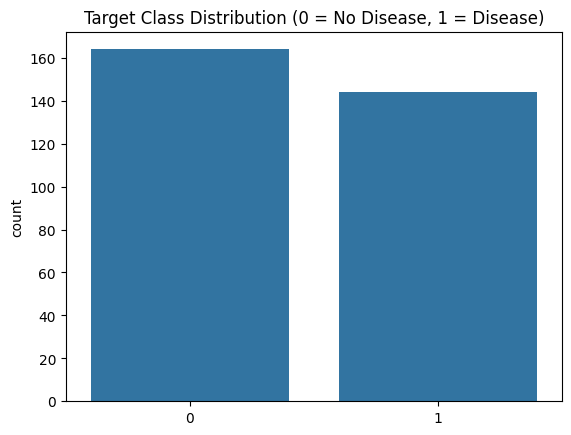

In [35]:
sns.countplot(x=y)
plt.title("Target Class Distribution (0 = No Disease, 1 = Disease)")
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Linear Kernel SVM

In [38]:
clf_linear = SVC(kernel='linear', class_weight='balanced', random_state=42)
clf_linear.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [39]:
y_pred_linear = clf_linear.predict(X_test)
print("\nLinear Kernel - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))
print("\nLinear Kernel - Classification Report:")
print(classification_report(y_test, y_pred_linear))


Linear Kernel - Confusion Matrix:
[[37 13]
 [10 33]]

Linear Kernel - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.72      0.77      0.74        43

    accuracy                           0.75        93
   macro avg       0.75      0.75      0.75        93
weighted avg       0.75      0.75      0.75        93



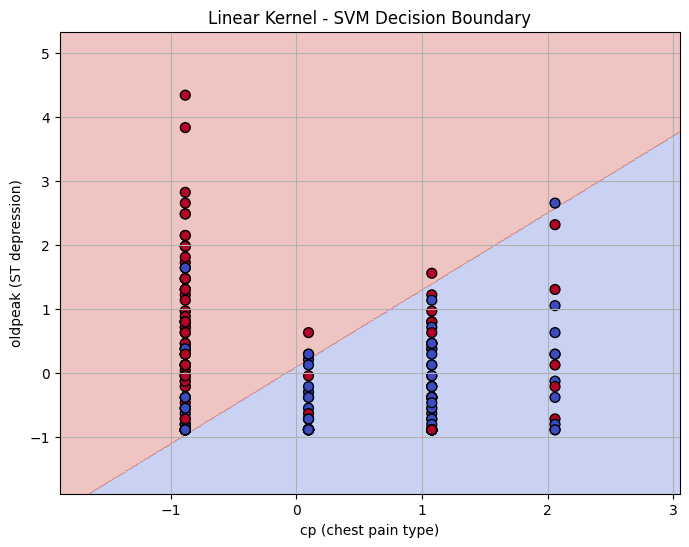

In [40]:
def plot_decision_boundary(clf, X, y, title):
    h = 0.01  # step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict using classifier
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
    plt.xlabel('cp (chest pain type)')
    plt.ylabel('oldpeak (ST depression)')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_decision_boundary(clf_linear, X_train, y_train, "Linear Kernel - SVM Decision Boundary")

##Polynomial Kernel SVM

In [41]:
clf_poly = SVC(kernel='poly', degree=2, C=1, gamma='scale', coef0=1, class_weight='balanced', random_state=42)
clf_poly.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', coef0=1, degree=2, kernel='poly',
    random_state=42)

In [42]:
y_pred_poly = clf_poly.predict(X_test)
print("\nPolynomial Kernel - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_poly))
print("\nPolynomial Kernel - Classification Report:")
print(classification_report(y_test, y_pred_poly))


Polynomial Kernel - Confusion Matrix:
[[37 13]
 [14 29]]

Polynomial Kernel - Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73        50
           1       0.69      0.67      0.68        43

    accuracy                           0.71        93
   macro avg       0.71      0.71      0.71        93
weighted avg       0.71      0.71      0.71        93



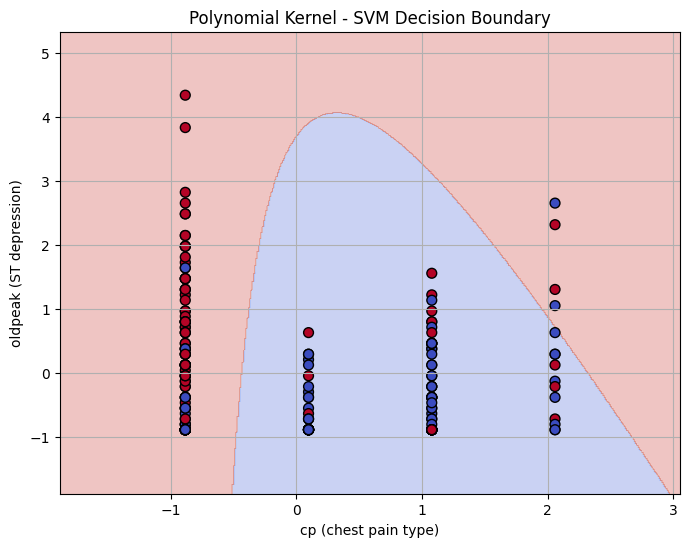

In [43]:
plot_decision_boundary(clf_poly, X_train, y_train, "Polynomial Kernel - SVM Decision Boundary")

##RBF Kernel SVM

In [44]:
clf_rbf = SVC(kernel='rbf', C=0.3, gamma=0.5, class_weight='balanced', random_state=42)
clf_rbf.fit(X_train, y_train)

SVC(C=0.3, class_weight='balanced', gamma=0.5, random_state=42)

In [45]:
y_pred_rbf = clf_rbf.predict(X_test)
print("\nRBF Kernel - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))
print("\nRBF Kernel - Classification Report:")
print(classification_report(y_test, y_pred_rbf))


RBF Kernel - Confusion Matrix:
[[37 13]
 [10 33]]

RBF Kernel - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.72      0.77      0.74        43

    accuracy                           0.75        93
   macro avg       0.75      0.75      0.75        93
weighted avg       0.75      0.75      0.75        93



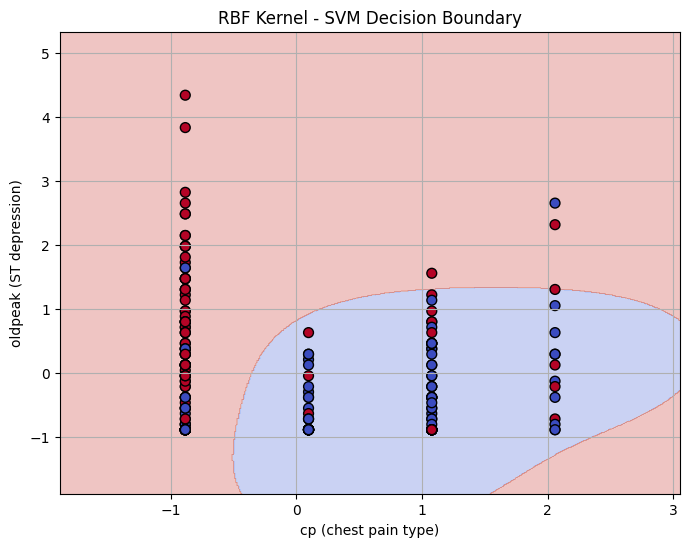

In [46]:
plot_decision_boundary(clf_rbf, X_train, y_train, "RBF Kernel - SVM Decision Boundary")

## Experiment with Hyperparameters (C and Gamma)

In [47]:
C_values = [0.1, 1, 10]
gamma_values = [0.1, 0.5, 1]

In [48]:
for C in C_values:
    for gamma in gamma_values:
        print(f"\nExperimenting with C={C} and gamma={gamma}")

        # Linear Kernel SVM
        clf = SVC(kernel='linear', C=C, gamma=gamma, class_weight='balanced', random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"\nLinear Kernel - C={C} and gamma={gamma}")
        print(classification_report(y_test, y_pred))

        # Polynomial Kernel SVM
        clf = SVC(kernel='poly', degree=2, C=C, gamma=gamma, coef0=1, class_weight='balanced', random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"\nPolynomial Kernel - C={C} and gamma={gamma}")
        print(classification_report(y_test, y_pred))

        # RBF Kernel SVM
        clf = SVC(kernel='rbf', C=C, gamma=gamma, class_weight='balanced', random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"\nRBF Kernel - C={C} and gamma={gamma}")
        print(classification_report(y_test, y_pred))


Experimenting with C=0.1 and gamma=0.1

Linear Kernel - C=0.1 and gamma=0.1
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        50
           1       0.71      0.74      0.73        43

    accuracy                           0.74        93
   macro avg       0.74      0.74      0.74        93
weighted avg       0.74      0.74      0.74        93


Polynomial Kernel - C=0.1 and gamma=0.1
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        50
           1       0.72      0.72      0.72        43

    accuracy                           0.74        93
   macro avg       0.74      0.74      0.74        93
weighted avg       0.74      0.74      0.74        93


RBF Kernel - C=0.1 and gamma=0.1
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        50
           1       0.70      0.70      0.70        43

    accuracy                  